In [239]:
import pandas
import matplotlib.pyplot as plot

In [240]:
data = pandas.read_csv('data/imdb_dataset.csv')

# Gráficos: Certificados

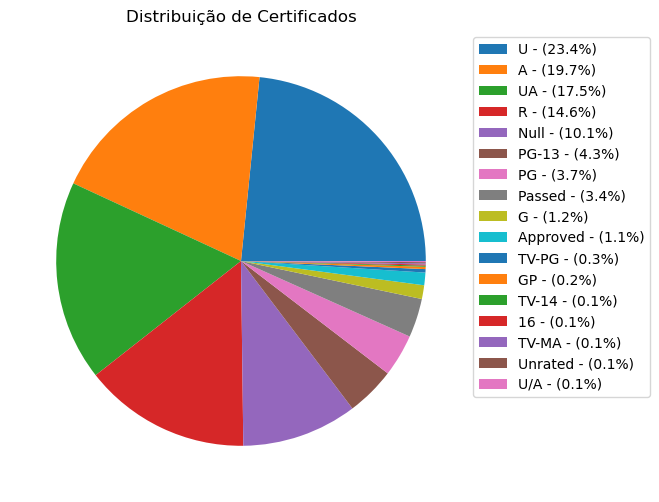

In [241]:
# Contagem dos dados nulos e dados reais
null_counts = data['Certificate'].isnull().sum()
all_values_counts = data['Certificate'].value_counts()

# Concatenação dos dados reais com os nulos
all_values_counts = pandas.concat([all_values_counts, pandas.Series([null_counts], index=['Null'])])

# Ordenação dos dados em ordem decrescente
all_values_counts = all_values_counts.sort_values(ascending=False)

# Configuração do gráfico
plot.figure(figsize=(10, 6))
plot.pie(all_values_counts, autopct=None)
plot.title("Distribuição de Certificados")
labels = [f"{label} - ({count / all_values_counts.sum() * 100:.1f}%)" for label, count in zip(all_values_counts.index, all_values_counts)]
plot.legend(labels=labels, loc='upper right', bbox_to_anchor=(1.4, 1))
plot.show()

# Gráficos: Avaliação IMDB

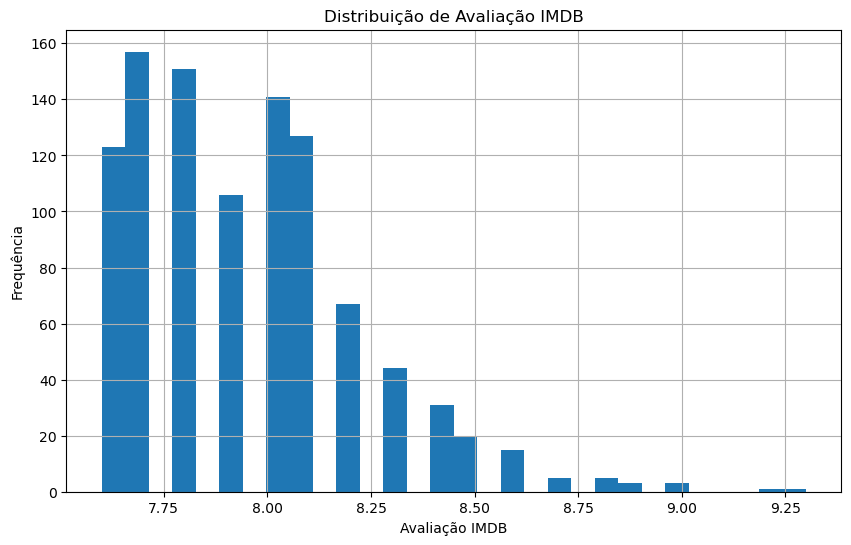

In [242]:
plot.figure(figsize=(10, 6))
data['IMDB_Rating'].hist(bins=30)
plot.title("Distribuição de Avaliação IMDB")
plot.xlabel("Avaliação IMDB")
plot.ylabel("Frequência")
plot.show()

# Gráfico: Avaliação Metascore

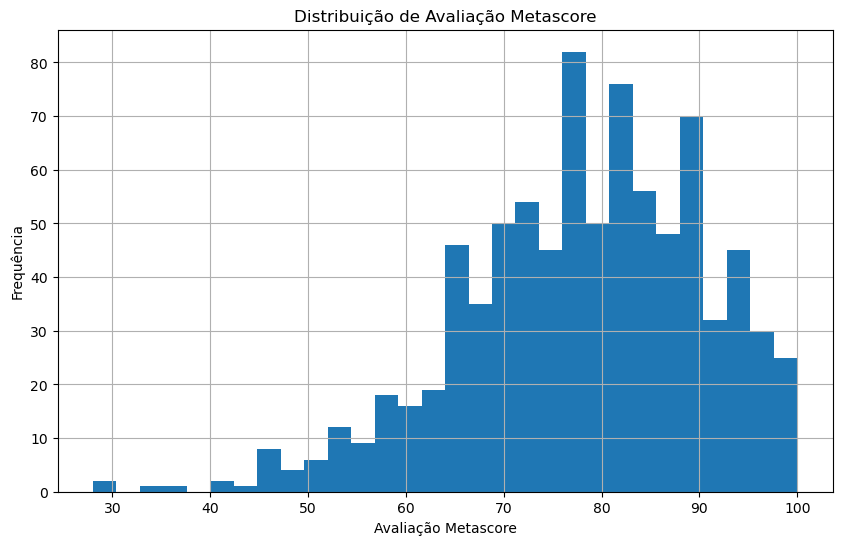

In [243]:
plot.show()
plot.figure(figsize=(10, 6))
data['Meta_score'].hist(bins=30)
plot.title("Distribuição de Avaliação Metascore")
plot.xlabel("Avaliação Metascore")
plot.ylabel("Frequência")
plot.show()

# Gráfico: Relação: IMDB x Metascore

In [244]:
plot.figure(figsize=(10, 6))
plot.scatter(data['IMDB_Rating'], data['Meta_score'])
plot.title("Relação entre Avaliação IMDB e Metascore")
plot.xlabel("Avaliação IMDB")
plot.ylabel("Avaliação Metascore")
plot.show()

# Gráfico: Duração: Filmes/Programas de TV

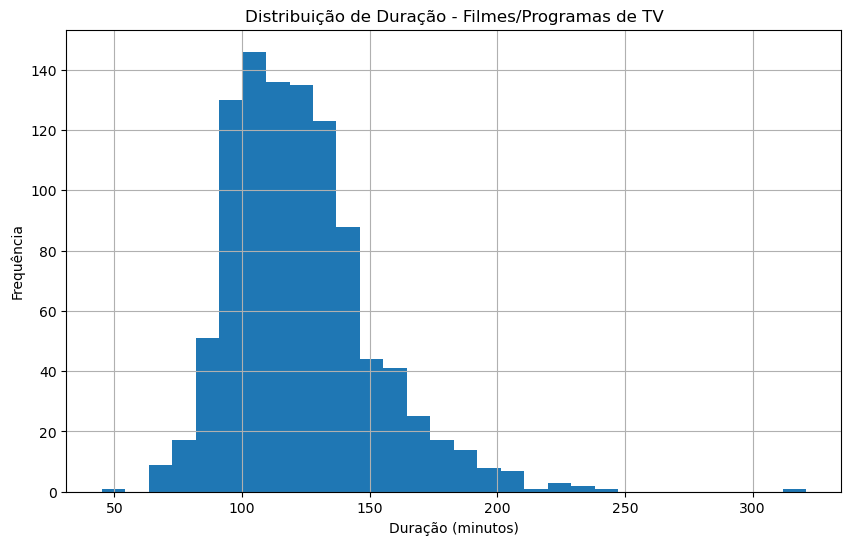

In [245]:
# Extrair o valor numérico da string
data['Runtime_minutes'] = data['Runtime'].str.extract('(\\d+)', expand=False).astype(int)

# Configuração do gráfico
plot.figure(figsize=(10, 6))
data['Runtime_minutes'].hist(bins=30)
plot.title("Distribuição de Duração - Filmes/Programas de TV")
plot.xlabel("Duração (minutos)")
plot.ylabel("Frequência")
plot.show()

# Gráfico: Gêneros

In [246]:
# Dividir os valores de "Genre" em várias linhas, uma para cada gênero
genres = data['Genre'].str.split(', ', expand=True)

# Contar a frequência de cada gênero
years_counts = genres.stack().value_counts()

# Configuração do gráfico
plot.figure(figsize=(10, 6))
years_counts.plot(kind='bar')
plot.title("Distribuição de Gêneros")
plot.xlabel("Gênero")
plot.ylabel("Frequência")

plot.show()

# Conceitos de Estatística

## Média

In [247]:
print(f"Média - Total de Votos: {data['Meta_score'].mean():.2f}")
print(f"Média - Avaliação IMDB: {data['IMDB_Rating'].mean():.2f}")
print(f"Média - Avaliação Metascore: {data['No_of_Votes'].mean():.2f}")

Média - Total de Votos: 77.97
Média - Avaliação IMDB: 7.95
Média - Avaliação Metascore: 273692.91


## Mediana

In [248]:
print(f"Mediana - Total de Votos: {data['No_of_Votes'].median()}")
print(f"Mediana - Avaliação IMDB: {data['IMDB_Rating'].median()}")
print(f"Mediana - Avaliação Metascore: {data['Meta_score'].median()}")

Mediana - Total de Votos: 138548.5
Mediana - Avaliação IMDB: 7.9
Mediana - Avaliação Metascore: 79.0


## Moda

In [249]:
print(f"Moda - Total de Votos: {data['No_of_Votes'].mode().values[0]}")
print(f"Moda - Avaliação IMDB: {data['IMDB_Rating'].mode().values[0]}")
print(f"Moda - Avaliação Metascore: {data['Meta_score'].mode().values[0]}")

Moda - Total de Votos: 65341
Moda - Avaliação IMDB: 7.7
Moda - Avaliação Metascore: 76.0


## Desvio Padrão

In [250]:
print(f"Desvio Padrão - Total de Votos: {data['No_of_Votes'].std():.2f}")
print(f"Desvio Padrão - Avaliação IMDB: {data['IMDB_Rating'].std():.2f}")
print(f"Desvio Padrão - Avaliação Metascore: {data['Meta_score'].std():.2f}")

Desvio Padrão - Total de Votos: 327372.70
Desvio Padrão - Avaliação IMDB: 0.28
Desvio Padrão - Avaliação Metascore: 12.38


## Quartis

In [251]:
data['Runtime_minutes'] = data['Runtime'].str.extract('(\\d+)', expand=False).astype(int)

q1_runtime = data['Runtime_minutes'].quantile(0.25)
q2_runtime = data['Runtime_minutes'].quantile(0.5)
q3_runtime = data['Runtime_minutes'].quantile(0.75)

# Exibir os resultados
print('Q1 de Runtime:', q1_runtime)
print('Q2 de Runtime:', q2_runtime)
print('Q3 de Runtime:', q3_runtime)

Q1 de Runtime: 103.0
Q2 de Runtime: 119.0
Q3 de Runtime: 137.0


## Percentis

In [252]:
percentil_20_runtime = data['Runtime_minutes'].quantile(0.2)
percentil_60_runtime = data['Runtime_minutes'].quantile(0.6)
percentil_90_runtime = data['Runtime_minutes'].quantile(0.8)

# Exibir os resultados
print('Percentil 20 de Runtime:', percentil_20_runtime)
print('Percentil 60 de Runtime:', percentil_60_runtime)
print('Percentil 80 de Runtime:', percentil_90_runtime)

Percentil 20 de Runtime: 100.0
Percentil 60 de Runtime: 126.0
Percentil 80 de Runtime: 142.0


## Probabilidade

In [253]:
prob_imdb_9 = (data['IMDB_Rating'] > 9.0).mean()
print(f"Probabilidade de um filme ter uma avaliação IMDB acima de 9.0: {prob_imdb_9 * 100:.2f}%")

Probabilidade de um filme ter uma avaliação IMDB acima de 9.0: 0.20%


In [254]:
prob_meta_40 = (data['Meta_score'] < 40).mean()
print(f"Probabilidade de um filme ter uma avaliação Metascore abaixo de 40: {prob_meta_40 * 100:.2f}%")

Probabilidade de um filme ter uma avaliação Metascore abaixo de 40: 0.40%


In [255]:
prob_runtime_150 = (data['Runtime'].str.extract('(\\d+)', expand=False).astype(int) > 150).mean()
print(f"Probabilidade de um filme ter uma duração acima de 150 minutos: {prob_runtime_150 * 100:.2f}%")

Probabilidade de um filme ter uma duração acima de 150 minutos: 14.70%
